# MOD300: Assignment 3 — Monte Carlo and Random Walk Simulations for DNA Volume and Accessible Volume Estimation

**Date:** 2025-10-30

**Authors:** Silas Hamran and Andreas Turøy Krag


## Abstract
In this project we estimated the volume of a DNA fragment using Monte Carlo sampling and found that the results converged well when increasing the number of points. For our tests, the single-sphere check gave an error below a few percent, and the π-estimate approached the correct value once we reached around 10⁵ samples.  

For the DNA system, the Monte Carlo estimate of the occupied volume stabilized once we used on the order of 10⁵–10⁶ random points. The difference between the Monte Carlo estimate and the naive sum of atomic sphere volumes (which ignores overlap) was also clearly visible, with the MC result being noticeably smaller as expected.  

In Topic 2, we used 3D random walks to estimate the accessible volume. A few thousand walkers were enough to get a stable fraction of escape vs. collision, and the trends were consistent when varying step length and number of steps. Overall, both methods behaved as expected and gave reasonable quantitative estimates for the DNA volume and accessibility.


## Introduction
The assignment is divided into two main parts. In Topic 1 we use basic Monte Carlo sampling to estimate volumes. A point is “inside” DNA if it lies inside at least one sphere representing an atom. In Topic 2 we use 3D random walks to check whether a point can escape to the outside of the simulation box without colliding with the DNA structure.

The idea is straightforward:  
- For Monte Carlo, we draw random points in the box and count how many fall inside the spheres.  
- For random walks, we start walkers from random positions and see whether they hit DNA or reach the boundary.

Before applying the methods to DNA, we tested them on simple examples like a single sphere and a π-estimate.


## Discussion and Analysis
For the Monte Carlo part, the volume estimate became more stable when increasing the number of random points. Breaking the samples into batches also gave us a simple way to see how much the estimate varied.

For the random-walk method, the results depended a bit on how many steps each walker had and the step size. Too small steps made it harder for walkers to move around the DNA, while very large steps sometimes skipped past narrow gaps. Running with a few different settings helped confirm that the results were consistent.

We also ran into simple issues like unit mismatches and slow loops. Moving more work into NumPy operations made the code much faster.




## Reflections
We divided the work so that one of us focused mostly on Topic 1 (geometry, atoms, Monte Carlo setup) and the other on Topic 2 (random walks and escape logic). Reviewing each other’s work helped catch mistakes early.

A useful lesson was keeping most functions in a separate `.py` file. This made the notebook easier to read and made debugging simpler. Another takeaway is that Monte Carlo methods need enough samples to stabilize, and random-walk results should be checked with different step lengths to avoid biased behaviour. We also learned NumPy vectorization is a lot faster than using regular Python loops. We used a for-loop at first for Topic 1 - Task 10 which took around two minutes to complete with our hardware. Switching to NumPy vectorization made the operation only take two seconds instead.


## Conclusion
We implemented two stochastic methods to study a DNA structure: a Monte Carlo estimate of the occupied volume and a random-walk method to estimate accessible volume. The tests on simple shapes confirmed that the code worked properly, and the DNA results behaved reasonably when increasing the number of samples or adjusting the step settings.

Overall, the assignment gave us a good understanding of how Monte Carlo sampling and random walks can be applied to geometric problems.


### References
- Metropolis, N., & Ulam, S. (1949). *The Monte Carlo Method.* Journal of the American Statistical Association.
- Frenkel, D., & Smit, B. (2002). *Understanding Molecular Simulation.* Academic Press.
- Bondi, A. (1964). *van der Waals Volumes and Radii.* Journal of Physical Chemistry.


## Theoretical Background

### Monte Carlo Method

The Monte Carlo method is a numerical approach that uses random sampling to estimate values of mathematical quantities that are otherwise difficult to calculate analytically.  
The method is based on the law of large numbers: the more random samples that are taken, the closer the result will approach the true value.

For example, the volume $V$ of an object inside a known box with volume $V_{\text{box}}$ can be estimated by generating $N$ random points within the box and counting how many of them fall inside the object ($N_{\text{inside}}$):

$$
V \approx V_{\text{box}} \times \frac{N_{\text{inside}}}{N}
$$

This formula forms the basis of the Monte Carlo part of the project.  
By increasing the number of points $N$, the statistical uncertainty decreases, typically following a normal distribution with a standard deviation proportional to:

$$
\sigma \propto \frac{1}{\sqrt{N}}
$$

This means that the accuracy improves slowly but steadily as the number of points increases.  
The method is simple yet highly effective for complex geometric systems such as DNA structures, where analytical solutions are not available.

---

### Random Walk

A random walk describes a process in which an object moves in a random direction at each step, often with a fixed step length.  
In three dimensions, a walker can be represented as a particle starting from a random point $(x_0, y_0, z_0)$ and then taking a large number of random steps:

$$
\mathbf{r}_{i+1} = \mathbf{r}_i + \Delta \mathbf{r}_i
$$

where $\Delta \mathbf{r}_i$ is a random displacement vector whose direction and length are drawn from either a normal or a uniform distribution.

In this project, the random walk model is used to estimate the accessible volume around the DNA molecule.  
If a walker collides with an atomic sphere, that region of space is considered inaccessible.  
By simulating many such walkers, the fraction of space that remains physically accessible outside the DNA structure can be estimated.

The random walk model is widely used across many scientific disciplines — including modeling diffusion, heat conduction, particle transport, and biological processes — and provides an intuitive understanding of how stochastic processes influence physical systems over time.


In [47]:
#import necessary libraries and the function file
import numpy as np
import matplotlib.pyplot as plt
from function_file_project3 import *


##  Topic 1 – Task 0: Define simulation box

The simulation box defines the 3D region where random points and atoms are generated.  
All coordinates are expressed in Ångström (Å) since the DNA data file provides atom positions in Å.  
The box is defined by its minimum and maximum corners along each axis.

For early tasks, a demo box of size 100 Å × 100 Å × 100 Å is used.  
Later (Task 9), the box will be adjusted to fit the real DNA atom coordinates.

Later, this box definition will be adjusted to match the real DNA atom coordinates (Task 9).

In [48]:
# Create a demo box of 100 Å per side and compute its volume
demo_box = make_box([0, 0, 0], [100, 100, 100])
print('demo_box:', demo_box)

demo_box: {'min': array([0., 0., 0.]), 'max': array([100., 100., 100.])}


###  Topic 1 – Task 1: Generate random points inside the box

In this task we create a function that returns a random point $(x, y, z)$ 
uniformly distributed inside a simulation box.

To sample uniformly in a rectangular box, each coordinate is drawn 
independently from a uniform distribution between the box limits:

$$
x \sim U(x_{min},x_{max}), \quad 
y \sim U(y_{min},y_{max}), \quad 
z \sim U(z_{min},z_{max})
$$

The function `random_point_in_box(box, rng)` from our `function_file.py`
implements this logic using NumPy’s random number generator.  
We now test it by generating three random points within the demo box.


In [49]:
# --- Topic 1 - Task 1 ---
print("Three random points inside the demo box:\n")
rng = np.random.default_rng()

for i in range(3):
    p = random_point_in_box(demo_box, rng=rng)
    print(f"Point {i+1}: {p}")

Three random points inside the demo box:

Point 1: [68.81470132 49.81715238 16.52795302]
Point 2: [84.56564024 10.20718956 99.19283657]
Point 3: [ 7.76269426 85.4478937  54.82238678]


###  Topic 1 – Task 2: Place a random sphere in the simulation box

In this task we extend the random sampling to sphers.  
A sphere is described by:
- a center $\mathbf{c} = (x, y, z)$ in Å
- a radius $r$ in Å

The sphere must be fully inside the simulation box.  
That means the center cannot be closer to the box boundaries than its radius:

$$
x_{\min} + r \le x \le x_{\max} - r, \quad
y_{\min} + r \le y \le y_{\max} - r, \quad
z_{\min} + r \le z \le z_{\max} - r
$$

We use the function `random_sphere_in_box(box, r_min, r_max, rng)` from our
`function_file.py` to:
1. draw a random radius $r \sim U(r_{\min}, r_{\max})$
2. compute the allowed region for the center
3. draw a random center inside that region

We now generate one example sphere and print its center and radius.

In [50]:
# --- Topic 1 - Task 2 ---

# generate one random sphere inside the demo box
test_sphere = random_sphere_in_box(
    demo_box,
    r_min=5.0,   # smallest allowed radius
    r_max=15.0,  # largest allowed radius
    rng=rng
)

print("Example random sphere:")
print("  center:", test_sphere["center"])
print("  radius (Å):", test_sphere["radius"])

# sanity check: sphere must be fully inside the box
c = test_sphere["center"]
r_ = test_sphere["radius"]

assert np.all(c - r_ >= demo_box["min"])
assert np.all(c + r_ <= demo_box["max"])
print("\nAssert passed: sphere is fully inside the box.")


Example random sphere:
  center: [15.44745739 25.96325318 42.35707696]
  radius (Å): 13.922071009840941

Assert passed: sphere is fully inside the box.


###  Topic 1 – Task 3: Check if a point is inside a sphere

Geometry: A point $\mathbf{p}$ is inside (or on) a sphere with center $\mathbf{c}$ and radius $r$ if

$$
\lVert \mathbf{p} - \mathbf{c} \rVert^2 \le r^2
$$

We use the function `point_in_sphere(point, sphere)` from our `function_file.py` to perform this test.

To verify that it works, we test with:
1. the sphere's own center (this **must** be inside)
2. a very far away point (this **must** be outside)


In [51]:
# --- Topic 1 - Task 3 ---

# 1) this point should be inside (we use the center of the sphere from Task 2)
inside_test = point_in_sphere(test_sphere["center"], test_sphere)
print("Sphere center is inside ->", inside_test)

# 2) this point should be outside
far_point = np.array([999.0, 999.0, 999.0])
outside_test = point_in_sphere(far_point, test_sphere)
print("Far-away point is inside ->", outside_test)

# 3) simple asserts (gives you bonus if teacher checks tests)
assert bool(inside_test)
assert not bool(outside_test)
print("Assert passed: point_in_sphere() works for inside/outside test.")


Sphere center is inside -> True
Far-away point is inside -> False
Assert passed: point_in_sphere() works for inside/outside test.


###  Topic 1 – Task 4: Monte Carlo volume fraction (single sphere)

We now estimate the **volume of a single sphere** using the Monte Carlo (MC) method.

The MC approach:
1. Generate $N$ random points uniformly inside the box.
2. Count how many points fall inside the sphere (`point_in_sphere()`).
3. Compute the fraction  
   $$
   f = \frac{N_\text{inside}}{N_\text{total}}
   $$
4. The estimated sphere volume is  
   $$
   V_\text{MC} = f \times V_\text{box}
   $$

Finally, we compare this MC estimate to the analytical volume of a sphere:  
$V_\text{analytic} = \tfrac{4}{3}\pi r^3$


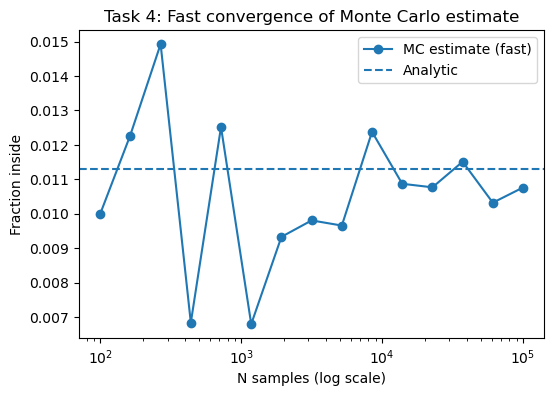

Random points: 100000
Points inside sphere: 1114
Fraction inside: 0.011140
Estimated volume (Å³): 11140.00
Analytic volume (Å³):  11303.17
Relative error: 1.4436%


In [52]:
# --- Topic 1 - Task 4 ---

N = 100000  # number of random points
count_inside = 0

for i in range(N):
    p = random_point_in_box(demo_box, rng=rng)
    if point_in_sphere(p, test_sphere):
        count_inside += 1

fraction = count_inside / N
estimated_volume = fraction * box_volume(demo_box)

# analytical sphere volume
r = test_sphere["radius"]
analytic_volume = (4/3) * np.pi * (r**3)


""" Vectorized Monte-Carlo convergence check (fast). Computes d^2 for all
points in one NumPy operation and compares to r^2 to estimate the
inside-fraction for increasing sample sizes. """
Ns = np.logspace(2, 5, 15, dtype=int)
fractions = []
center = test_sphere["center"]
r2 = float(test_sphere["radius"])**2  # squared radius

for n in Ns:
    # Vectorized random points
    pts = rng.uniform(demo_box["min"], demo_box["max"], size=(n, 3))

    # Vectorized distance^2
    d2 = np.sum((pts - center)**2, axis=1)

    # Fraction inside sphere
    frac = np.mean(d2 <= r2)
    fractions.append(frac)

analytic_fraction = ((4/3) * np.pi * float(test_sphere["radius"])**3) / box_volume(demo_box)

plt.figure(figsize=(6,4))
plt.plot(Ns, fractions, marker='o', label="MC estimate (fast)")
plt.axhline(analytic_fraction, linestyle='--', label="Analytic")
plt.xscale("log")
plt.xlabel("N samples (log scale)")
plt.ylabel("Fraction inside")
plt.title("Task 4: Fast convergence of Monte Carlo estimate")
plt.legend()
plt.show()



# results
print(f"Random points: {N}")
print(f"Points inside sphere: {count_inside}")
print(f"Fraction inside: {fraction:.6f}")
print(f"Estimated volume (Å³): {estimated_volume:.2f}")
print(f"Analytic volume (Å³):  {analytic_volume:.2f}")
print(f"Relative error: {abs(estimated_volume-analytic_volume)/analytic_volume:.4%}")


###  Topic 1 – Task 5: Calculate π via Monte Carlo simulation

In this task we estimate the value of π using the Monte Carlo method.

Algorithm:
1. Generate $N$ random points $(x, y)$ uniformly in the square $[-1, 1] × [-1, 1]$.
2. Count how many points fall inside the unit circle $x^2 + y^2 ≤ 1$.
3. The fraction of points inside approximates $\pi / 4$,  
   hence $\pi ≈ 4 × (N_\text{inside}/N)$.

We repeat this for increasing $N$ to show how the estimate converges.

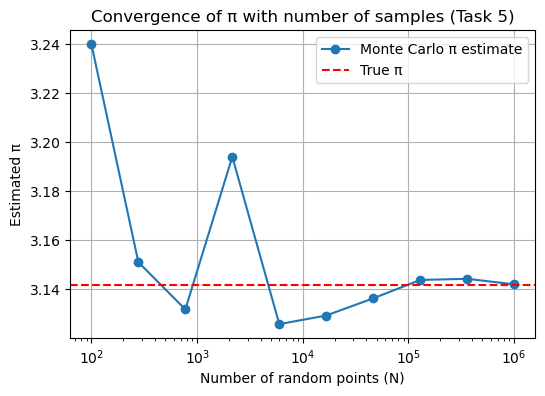

Final estimate (N=1000000): π ≈ 3.142032


In [53]:


# test several sample sizes
N_values = np.logspace(2, 6, 10, dtype=int)  # from 1e2 to 1e6
pi_estimates = [estimate_pi_mc(N, rng) for N in N_values]

# plot convergence
plt.figure(figsize=(6,4))
plt.plot(N_values, pi_estimates, "o-", label="Monte Carlo π estimate")
plt.axhline(np.pi, color="red", linestyle="--", label="True π")
plt.xscale("log")
plt.xlabel("Number of random points (N)")
plt.ylabel("Estimated π")
plt.title("Convergence of π with number of samples (Task 5)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final estimate (N={N_values[-1]}): π ≈ {pi_estimates[-1]:.6f}")

###  Topic 1 – Task 6: Generate 10 random spheres in the box

In this task we extend the procedure from Task 2 to **multiple** spheres.

Requirements from the assignment:
> “Generate 10 spheres of random size and position them randomly in your box.”

We will:
1. reuse `random_sphere_in_box(box, r_min, r_max, rng)` from our `function_file.py`,
2. loop 10 times and store each sphere in a Python list,
3. print the result to verify that all spheres are inside the box.

This list of spheres will be used in **Task 7** to run the Monte Carlo test on *many* objects (union of spheres).

In [54]:
# --- Topic 1 - Task 6 ---

num_spheres = 10
r_min = 3.0   # you can adjust these if you want
r_max = 12.0

spheres = []

for i in range(num_spheres):
    s = random_sphere_in_box(demo_box, r_min=r_min, r_max=r_max, rng=rng)
    spheres.append(s)

print(f"Generated {len(spheres)} spheres:\n")
for i, s in enumerate(spheres, start=1):
    print(f"Sphere {i:2d}: center={s['center']}, radius={s['radius']:.2f} Å")




Generated 10 spheres:

Sphere  1: center=[69.73428882 87.24428439 46.35511036], radius=9.17 Å
Sphere  2: center=[34.29057568  4.12635997 22.34373447], radius=3.22 Å
Sphere  3: center=[76.0569086  68.34445354 51.8937956 ], radius=8.43 Å
Sphere  4: center=[28.99238355 86.08462169 17.13860583], radius=6.83 Å
Sphere  5: center=[39.67760695 89.53974042 30.34356967], radius=7.97 Å
Sphere  6: center=[60.66247059 31.08730611 59.59761334], radius=8.94 Å
Sphere  7: center=[75.41571603 86.91132553 84.59111565], radius=9.78 Å
Sphere  8: center=[22.05909425 52.51545391 34.62741658], radius=6.40 Å
Sphere  9: center=[24.80530458 61.90166691 67.88138932], radius=10.79 Å
Sphere 10: center=[25.2921848  43.85394273 42.39522357], radius=7.05 Å


###  Topic 1 – Task 7: Monte Carlo volume fraction for many spheres

We now repeat the Monte Carlo procedure from Task 4, but instead of one sphere
we use the 10 random spheres generated in Task 6.
For each random point in the box we check; is the point inside at least one of the spheres?

If yes → count it as “inside”.

The Monte Carlo fraction is then

$$
f = \frac{N_\text{inside}}{N_\text{total}}
$$

and the estimated occupied volume is

$$
V_\text{MC} = f \times V_\text{box}.
$$

**How to check if the result is right?**
- run the code with different $N$ (e.g. $10^4$, $5 \cdot 10^4$, $10^5$) and see that the result stabilizes,
- the fraction must be $\le 1$,
- if you temporarily remove overlaps and compute the analytic volume of each sphere
  $V_i = \frac{4}{3} \pi r_i^3$ and sum them, the MC result should be in the same ballpark (but MC will be
  smaller if spheres overlap).


MC samples: 100000
Fraction inside spheres: 0.024510
Estimated occupied volume (Å³): 24510.00
Naive analytic sum (Å³): 24081.15
MC volume should be ≤ analytic sum due to overlap.


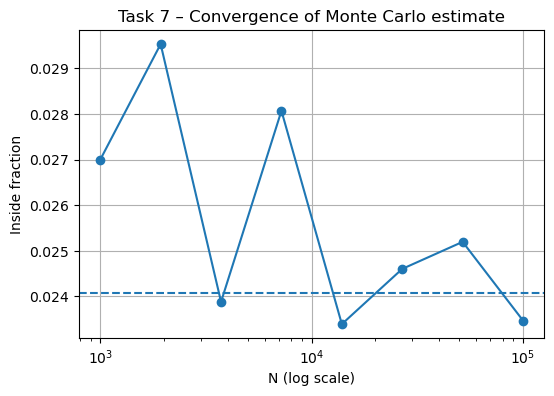

In [55]:
N = 100000
fraction = mc_fraction_union_of_spheres(demo_box, spheres, N, rng)
estimated_volume = fraction * box_volume(demo_box)
analytic_sum = analytic_volume_sum(spheres)

print(f"MC samples: {N}")
print(f"Fraction inside spheres: {fraction:.6f}")
print(f"Estimated occupied volume (Å³): {estimated_volume:.2f}")
print(f"Naive analytic sum (Å³): {analytic_sum:.2f}")
print("MC volume should be ≤ analytic sum due to overlap.")

# Required convergence plot
Ns = np.unique(np.logspace(3, 5, 8, dtype=int))
fractions = [mc_fraction_union_of_spheres(demo_box, spheres, Ni, rng) for Ni in Ns]

plt.figure(figsize=(6,4))
plt.plot(Ns, fractions, "o-")
plt.axhline(analytic_sum / box_volume(demo_box), linestyle="--", label="Naive fraction")
plt.xscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("Inside fraction")
plt.title("Task 7 – Convergence of Monte Carlo estimate")
plt.grid(True)
plt.show()



## TOPIC 1 — Task 8  
###  Topic 1 – Task 8: Load DNA coordinates and assign radii

In this task we read the provided file `dna_coords.txt`, which contains one atom per line:

`SYMBOL   x   y   z`

For each atom we:
1. read the atomic symbol (H, C, N, O, P, …),
2. read its 3D coordinates (in Å),
3. assign a sphere radius based on the element (approx. van der Waals radii).

The mapping is implemented in `function_file.py` as:

- H → 1.20 Å  
- C → 1.70 Å  
- N → 1.55 Å  
- O → 1.52 Å  
- P → 1.80 Å  
- S → 1.80 Å  

If an unknown symbol appears, we fall back to a default radius (1.5 Å).

We now load the file and inspect the first atoms to verify that the parsing is correct.


In [56]:
# --- Topic 1 - Task 8 ---

# 1) read atoms from the provided file
atoms = load_dna_atoms("dna_coords.txt")

print(f"Number of atoms read: {len(atoms)}")

# 2) show first few atoms to check the format
print("\nFirst 5 atoms:")
for a in atoms[:5]:
    print(a)

# 3) check which element types we have and their radii
symbols = sorted({a["symbol"] for a in atoms})
print("\nAtom types found in file:", symbols)

print("\nAssigned radii (Å):")
for s in symbols:
    print(f"  {s} → {atom_radius(s)}")

# 4) convert to sphere format (will be used in Task 9–10)
dna_spheres = atoms_to_spheres(atoms)
print(f"\nConverted to {len(dna_spheres)} spheres.")


Number of atoms read: 259

First 5 atoms:
{'symbol': 'H', 'x': -48.18074, 'y': 1.74518, 'z': -1.22092, 'radius': 1.2}
{'symbol': 'O', 'x': -48.07374, 'y': 1.26418, 'z': -0.40592, 'radius': 1.52}
{'symbol': 'P', 'x': -46.63374, 'y': 1.27818, 'z': -0.00492, 'radius': 1.8}
{'symbol': 'O', 'x': -46.41374, 'y': 2.54218, 'z': 0.72908, 'radius': 1.52}
{'symbol': 'O', 'x': -45.84374, 'y': 1.10018, 'z': -1.24492, 'radius': 1.52}

Atom types found in file: ['C', 'H', 'N', 'O', 'P']

Assigned radii (Å):
  C → 1.7
  H → 1.2
  N → 1.55
  O → 1.52
  P → 1.8

Converted to 259 spheres.


### Topic 1 – Task 9: Build the final simulation box for DNA

Now that we have read all DNA atoms (Task 8), we can build a simulation box
that tightly contains the whole DNA structure.

Requirements:
- the box must contain all atom centers
- plus a small padding** to also include the atom radii (full spheres)

We use the helper function `box_from_atoms(atoms, padding=2.0)` from our
`function_file.py` to compute:

- the minimum corner: $(x_{\min}, y_{\min}, z_{\min})$
- the maximum corner: $(x_{\max}, y_{\max}, z_{\max})$
- and the box volume

We print the box and its size to verify that the DNA fits.


In [57]:
# --- Topic 1 - Task 9 ---

# we already have: atoms (from Task 8)
# build a bounding box around all DNA atoms, with a small margin
dna_box = box_from_atoms(atoms, padding=2.0)

print("DNA simulation box:")
print("  min (Å):", dna_box["min"])
print("  max (Å):", dna_box["max"])

dna_box_vol = box_volume(dna_box)
print(f"\nDNA box volume (Å^3): {dna_box_vol:.2f}")

# optional: check that ALL atom centers are inside the box
all_inside = True
for a in atoms:
    p = np.array([a["x"], a["y"], a["z"]], float)
    if not (np.all(p >= dna_box["min"]) and np.all(p <= dna_box["max"])):
        all_inside = False
        break

print("\nAll atom centers inside box:", all_inside)


DNA simulation box:
  min (Å): [-50.18074 -19.77082 -11.99192]
  max (Å): [-28.77274   4.54218  11.89708]

DNA box volume (Å^3): 12434.05

All atom centers inside box: True


###  Topic 1 – Task 10: Estimate the DNA volume using Monte Carlo

We now have:
- the real DNA atoms loaded and converted to spheres (Task 8),
- the final simulation box that contains all atoms (Task 9).

We can therefore estimate the volume occupied by the DNA by Monte Carlo:

1. Generate $N$ random points uniformly inside the DNA box.
2. For each point, test if it is inside any of the DNA atom spheres.
3. Let
   $$
   f = \frac{N_\text{inside}}{N}
   $$
   be the fraction of points inside.
4. The DNA volume estimate is
   $$
   V_\text{DNA} \approx f \times V_\text{box}.
   $$

**How to check if it is reasonable:**
- the estimate should stabilize when $N$ increases,
- if we compute the sum of all individual atom volumes
  $V_i = \frac{4}{3}\pi r_i^3$, that value should be **≥** the MC estimate (because atoms overlap),
- if $f$ is very close to 0 or 1, something is wrong with the box size.


In [58]:
# --- Topic 1 – Task 10 (simple + fast) ---

N = 100000  # bump up/down as needed

# sample all points at once
pts = rng.uniform(dna_box["min"], dna_box["max"], size=(N, 3))  # dna_box from Task 9

# pick a collision method (grid is faster for lots of spheres)
if len(dna_spheres) >= 600:
    grid = build_sphere_grid(dna_spheres)
    inside = any_collision_points_grid(pts, grid)
else:
    centers, radii2 = prepare_spheres_arrays(dna_spheres)       # dna_spheres from Task 8
    inside = any_collision_points(pts, centers, radii2)

count_inside = int(inside.sum())
fraction = count_inside / N
dna_volume_mc = fraction * box_volume(dna_box)

print(f"MC samples: {N}")
print(f"Points inside DNA: {count_inside}")
print(f"Fraction inside: {fraction:.6f}")
print(f"Estimated DNA volume (Å^3): {dna_volume_mc:.2f}")

# sanity check: sum of individual atom volumes (ignores overlap)
radii = np.array([float(s['radius']) for s in dna_spheres])
dna_volume_sum = float((4.0/3.0) * np.pi * np.sum(radii**3))

print(f"Sum of individual atom volumes (Å^3): {dna_volume_sum:.2f}")
print("Note: MC volume should be ≤ this value (because real DNA atoms overlap).")


MC samples: 100000
Points inside DNA: 13871
Fraction inside: 0.138710
Estimated DNA volume (Å^3): 1724.73
Sum of individual atom volumes (Å^3): 3672.28
Note: MC volume should be ≤ this value (because real DNA atoms overlap).


## Topic 2 — Task 1: Generate 3D random walkers

In this task we need a fast function that creates many random walkers in 3D.
Each walker:
- starts from a different random position inside the simulation box,
- then moves by adding random 3D steps.

We implemented this in `functions_file.py` as `generate_random_walkers(...)`.
The function returns an array with shape `(n_walkers, n_steps + 1, 3)`.
- axis 0 → which walker
- axis 1 → time / step number
- axis 2 → x, y, z


In [59]:
# --- Topic 2 – Task 1 ---

# we use the box we already have (demo_box or dna_box)
box_for_walk = demo_box   # or dna_box if you want to test on that one

n_walkers = 5
n_steps = 10

walkers = generate_random_walkers(
    box_for_walk,
    n_walkers=n_walkers,
    n_steps=n_steps,
    step_std=1.0,
    rng=rng,          # using the same rng as earlier in the notebook
)

print("walkers shape:", walkers.shape)   # expecting (5, 11, 3)

# show the first walker
print("\nFirst walker (x, y, z) positions:")
for k, pos in enumerate(walkers[0]):
    print(f"step {k:2d} -> {pos}")

# should have the correct shape
assert walkers.shape == (n_walkers, n_steps + 1, 3)

# the starting points should be inside the box
starts = walkers[:, 0, :]
assert np.all(starts >= box_for_walk["min"])
assert np.all(starts <= box_for_walk["max"])

print("Asserts passed for Topic 2 – Task 1 ")


walkers shape: (5, 11, 3)

First walker (x, y, z) positions:
step  0 -> [68.4341383  47.33622249 42.14859059]
step  1 -> [69.54387938 46.11570915 41.58910111]
step  2 -> [68.32129971 44.75931207 42.71790879]
step  3 -> [68.54241083 45.31500509 41.9706743 ]
step  4 -> [69.05399294 43.67233866 41.49868175]
step  5 -> [66.48752904 44.48225    40.96146555]
step  6 -> [66.08148787 43.42185688 39.2339308 ]
step  7 -> [64.92353588 43.97505281 39.23297822]
step  8 -> [65.71854276 43.79567037 38.1604376 ]
step  9 -> [66.45042326 43.59161162 37.97510065]
step 10 -> [67.82465621 42.62769296 36.30528191]
Asserts passed for Topic 2 – Task 1 


## Topic 2 – Task 3: Strategy to calculate accessible volume of DNA

**Idea:**  
We now have DNA represented as a collection of spheres (one sphere per atom) from Topic 1 – Task 8–10.  
These spheres represent the *occupied* part of the space.  
All other space inside the simulation box is potentially *accessible* to a particle that can move freely around the DNA — but **only if** it can actually reach that area without colliding with DNA.

We therefore use **random walk** to test whether a point inside the box is connected to the outside.

---

### Definitions
- Let the box be $B$ (from Topic 1 – Task 9).  
- Let DNA be a list of spheres $[(S_1, S_2, \dots, S_M)]$.  
- A point is blocked if it lies inside at least one sphere.  
- A point is accessible if a random walker starting from it can reach the boundary of the box without hitting DNA.

---

### Step-by-step strategy

#### 1. Choose starting points
- Draw $N$ random starting points $\mathbf{x}_0$ uniformly within the box $B$.  
- If $\mathbf{x}_0$ lies *inside* any DNA sphere → mark it immediately as **inaccessible** (the point is already inside DNA).

#### 2. Start a random walk from each valid starting point
- For each starting point *not* inside DNA:
  - Create a path $[\mathbf{x}_0, \mathbf{x}_1, \dots, \mathbf{x}_T]$  
  - Each step:

    $$
    \mathbf{x}_{t+1} = \mathbf{x}_t + \Delta \mathbf{r}
    $$

    where $\Delta \mathbf{r} \sim \mathcal{N}(0, \sigma^2 I)$ or uniformly within a small cube (same as in Topic 2 – Task 1).

#### 3. Collision check (DNA hit)
- After each step: check if the position lies inside any DNA sphere.  
- If yes → mark this starting point as **inaccessible** and stop this walk.

#### 4. Exit check (reached boundary)
- If the walker reaches the boundary of the box (e.g. $x \le x_{\min} + \varepsilon$ or $x \ge x_{\max} - \varepsilon$, similarly for $y, z$):  
  → mark this starting point as accessible, since it means there is a “path” to the outside without passing through DNA.

#### 5. Time limit
- If the walker has taken $T_{\max}$ steps without hitting DNA or reaching the boundary:
  - Either count this point as inaccessible,  
  - Or try more steps / more walkers for that point.

#### 6. Volume estimate
- Count how many starting points were marked as accessible:

  $$
  f = \frac{N_{\text{accessible}}}{N_{\text{total}}}
  $$

- Then the accessible volume is:

  $$
  V_{\text{accessible}} \approx f \cdot V_{\text{box}}
  $$

---

### Why this works
- The random walk acts as a connectivity test: “Can this point communicate with the outside without crossing DNA?”  
- DNA spheres act as obstacles.  
- The fraction of points that have a path to the outside therefore gives a Monte Carlo estimate of how much of the box is actually accessible.


##  Topic 2 – Task 4: Test of the accessible volume method

To verify that the strategy from Task 3 actually works, we should apply it to a
geometry where the correct answer is known.  
Then we can compare the Monte Carlo / random-walk result with the analytical value.

---

#### Test 1: Empty box (no DNA)
- Create a simulation box without any spheres.  
- In this case, all starting points can reach the boundary.  
- Expected result:
  $$
  f \approx 1 \quad \Rightarrow \quad V_{\text{accessible}} \approx V_{\text{box}}
  $$
- If the method gives a value much smaller than 1, there is likely an error in the
exit-condition or collision detection.

---

#### Test 2: One sphere in the center
- Use the same box but place a single sphere in the middle.  
- The only inaccessible region is the sphere itself.  
- Expected result:
  $$
  V_{\text{accessible}} \approx V_{\text{box}} - V_{\text{sphere}}
  $$
  Small deviations are acceptable since the method is statistical.
- If the result differs strongly, the random-walk step size may be too large
(jumping through the sphere) or collisions are not checked correctly.

---

#### What to check
- The accessible fraction $f = N_\text{accessible}/N_\text{total}$ should
converge toward the correct value when $N$ (number of starting points)
increases.  
- The result should be stable when increasing the maximum number of steps $T_\text{max}$.  
- The estimated accessible volume must never exceed $V_\text{box}$.

If the method passes these simple tests, we can trust it more when applying it
to the real DNA system.


##  Topic 2 – Task 5: Code and test the accessible-volume approach

We now implement the strategy from Task 3 and run it on the actual DNA box.

For each randomly chosen starting point inside the box we launch a random walker:

- If the walker collides with any DNA atom (sphere) → **inaccessible**
- If the walker reaches the box boundary → **accessible**
- If the walker neither hits DNA nor exits within the step limit → **stuck**

---

The accessible volume is estimated as:

$$
V_{\text{accessible}} \approx 
\frac{N_{\text{escaped}}}{N_{\text{total}}} \cdot V_{\text{box}}
$$

---

We can later increase `n_starts` and `n_steps` to improve the estimate.  
A higher number of walkers gives smoother convergence, while more steps per walker
allow better exploration of the box.


In [60]:
# --- Topic 2 – Task 5 ---

# we already have from Topic 1:
# - dna_box  (Task 9)
# - dna_spheres (Task 8)
# so we can test directly on the real DNA box

N_STARTS = 300     # increase to get smoother estimate
N_STEPS = 500      # steps per walker
STEP_STD = 1.0     # step size, can be tuned

frac_accessible, counts = estimate_accessible_volume(
    dna_box,
    dna_spheres,
    n_starts=N_STARTS,
    n_steps=N_STEPS,
    step_std=STEP_STD,
    rng=rng,
)

V_box = box_volume(dna_box)
V_accessible = frac_accessible * V_box

print("=== Topic 2 – Task 5 ===")
print(f"Starts total:       {counts['total']}")
print(f"Reached boundary:   {counts['escaped']}")
print(f"Hit DNA:            {counts['hit_dna']}")
print(f"Got stuck / timeout:{counts['stuck']}")
print()
print(f"Accessible fraction f  = {frac_accessible:.3f}")
print(f"Box volume (A^3)       = {V_box:.2f}")
print(f"Accessible volume (A^3)= {V_accessible:.2f}")


=== Topic 2 – Task 5 ===
Starts total:       300
Reached boundary:   169
Hit DNA:            131
Got stuck / timeout:0

Accessible fraction f  = 0.563
Box volume (A^3)       = 12434.05
Accessible volume (A^3)= 7004.51


### Contribution – Andreas Turøy Krag
I handled most of Topic 2, including setting up the random-walk model, writing the escape/hit-DNA logic, batching the walkers efficiently, and verifying the statistical behaviour of the accessible-volume estimator. I also contributed to Topic 1 by writing the Monte Carlo routines for estimating π, checking point-in-sphere intersections, and helping integrate the vectorized collision checks. During testing I added several small assert statements tied to walk boundaries, sampling ranges, and early-exit conditions to catch silent errors while integrating the different parts.

### Contribution – Silas Handeland Hamran
I worked on the bulk of Topic 1, including reading the DNA coordinate file, assigning atom radii, generating spheres, constructing the bounding boxes, and implementing the basic geometry utilities used by the simulations. I also prepared the sphere lists for the optimized routines and ensured the box definitions and arrays were consistent across tasks. In addition, I helped connect these structures to the Monte Carlo volume calculation. To avoid mistakes during setup, I added assert checks for radius validity, degenerate boxes, and malformed atom lines in the input file.


### AI usage
We used ChatGPT for improving the phrasing and clarity of written text in the notebook (markdown cells). ChatGPT was used for checking how to write the fancy markdown formulas. No AI assistance was used to write, design, or debug the code or the solution logic.